## Experimento Covariados
El objetivo de este experimento es cuantificar el desempeno de los modelos prediccion de tweets variando los distintos covariados temporales que se tienen a disposicion. Para ello primero se define la funcion principal de covariados que contiene todos los valores disponibles, se escoge una franja de fechas para entrenar y validar los modelos y para cada combiancion posible de covariados a utilizar se reporta el error cometido en la prediccion

In [1]:
from modelo_tweets import *

In [2]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([(pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),
                     t.weekday()/6.0,(t.hour > 12)*1,1
                    ])

In [3]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [47]:
train_period=('2019-05-01 00:00','2019-05-30 00:00')
validate_period=('2019-05-30 00:00','2019-06-10 00:00')

In [59]:
model=modelTweets(data,
                  train_period,
                  validate_period,
                  f_covariates=(TC,restore_date),
                  followers_rate=7,
                  win_size_pred_period=1
                 )
model.train()
model.compute_lambda_predict()
model.compute_errors()
E1=model.errors_predict
E2=model.errors_predict_cum

In [64]:
import itertools

In [ ]:
results={}
results_cum={}
for j in range(1,7):
    for i in list(itertools.combinations(np.arange(6),j)):
        print(i,np.array(i+(6,)))
        func = lambda x: TC(x)[np.array(i+(6,))]
        
        model=modelTweets(data,
                  train_period,
                  validate_period,
                  f_covariates=(func,restore_date),
                  followers_rate=7,
                  win_size_pred_period=1
                 )
        model.train()
        model.compute_lambda_predict()
        model.compute_errors()
        results[i]=model.errors_predict
        results_cum[i]=model.errors_predict_cum

(0,) [0 6]


/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:170: RuntimeWarning: divide by zero encountered in true_divide
  return count_events / kernel_int.sum()
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:170: RuntimeWarning: invalid value encountered in true_divide
  return count_events / kernel_int.sum()
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:592: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


(1,) [1 6]
(2,) [2 6]
(3,) [3 6]
(4,) [4 6]
(5,) [5 6]
(0, 1) [0 1 6]
(0, 2) [0 2 6]
(0, 3) [0 3 6]
(0, 4) [0 4 6]
(0, 5) [0 5 6]
(1, 2) [1 2 6]
(1, 3) [1 3 6]
(1, 4) [1 4 6]
(1, 5) [1 5 6]
(2, 3) [2 3 6]
(2, 4) [2 4 6]
(2, 5) [2 5 6]


In [144]:
with open('errors_cov.pickle', 'rb') as f:
    x = pickle.load(f)

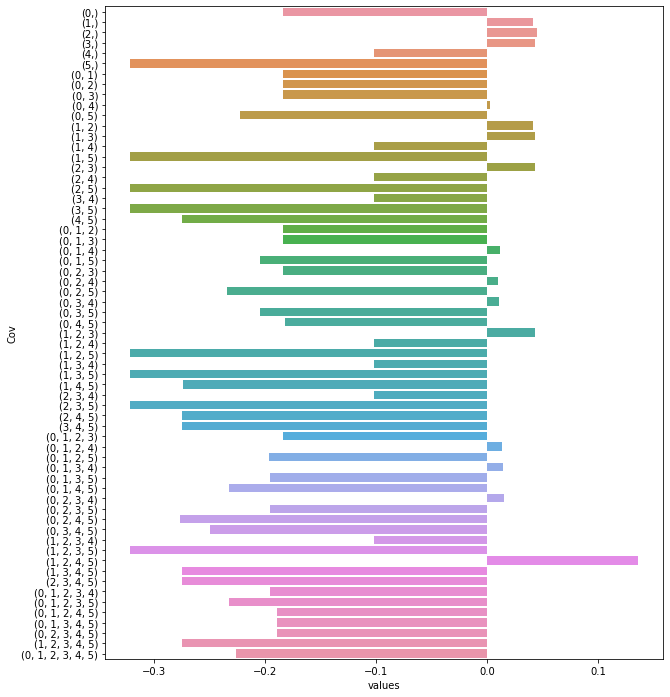

In [164]:
Pearson=pd.DataFrame({'Cov':list(x.keys()),'values':[x[i]['Pearson'][0] for i in x]})
plt.figure(figsize=(10,12))
sns.barplot(data=Pearson,x='values',y='Cov')

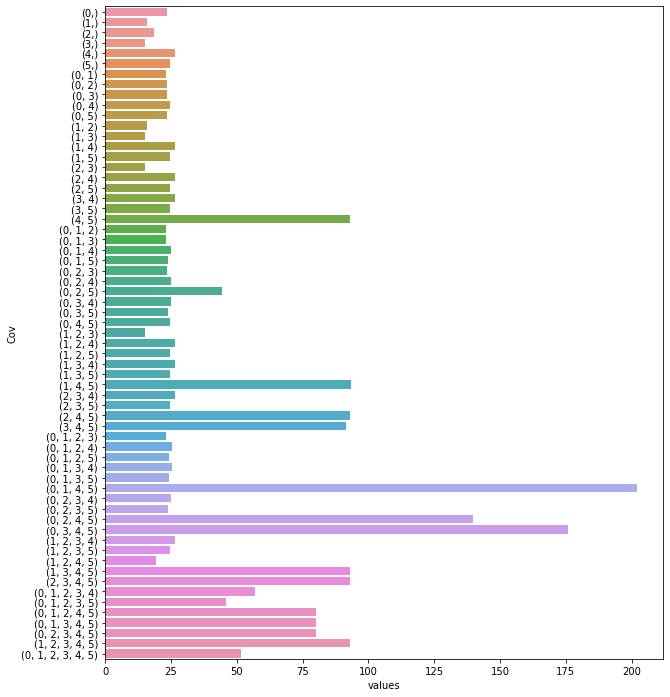

In [165]:
MAE=pd.DataFrame({'Cov':list(x.keys()),'values':[x[i]['MAE'] for i in x]})
plt.figure(figsize=(10,12))
sns.barplot(data=MAE,x='values',y='Cov')

In [170]:
MAE.sort_values('values').head()

,Cov,values
3,"(3,)",14.987797
15,"(2, 3)",14.987797
12,"(1, 3)",14.987797
31,"(1, 2, 3)",14.987826
1,"(1,)",16.099594


In [172]:
with open('errors_cum_cov.pickle', 'rb') as f:
    y = pickle.load(f)

,Cov,values
1,"(1,)",0.116920
11,"(1, 2)",0.116997
26,"(0, 2, 4)",0.165929
28,"(0, 3, 4)",0.166107
9,"(0, 4)",0.166112


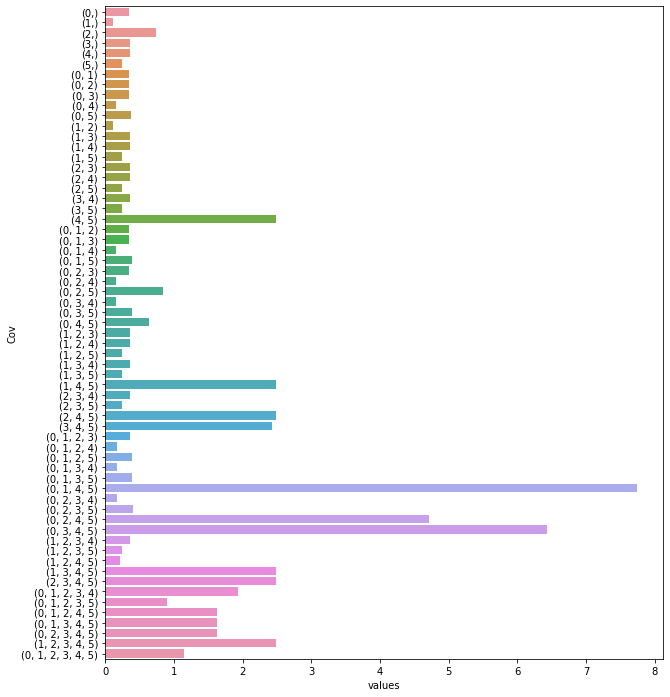

In [176]:
MAPE=pd.DataFrame({'Cov':list(y.keys()),'values':[y[i]['MAPE'] for i in y]})
plt.figure(figsize=(10,12))
sns.barplot(data=MAPE,x='values',y='Cov')
MAPE.sort_values('values').head()

In [173]:
y

{(0,): {'APE': array([0.77636793, 0.77002782, 0.74404199, 0.71220348, 0.70025434,
         0.71143561, 0.74035334, 0.77493429, 0.80815097, 0.8273371 ,
         0.84501936, 0.85822609, 0.86251939, 0.8645872 , 0.85983497,
         0.85249258, 0.84431644, 0.83588715, 0.82828583, 0.82292659,
         0.82547269, 0.8285365 , 0.83079103, 0.83181442, 0.8294331 ,
         0.82759007, 0.82571172, 0.8228528 , 0.82104515, 0.81879649,
         0.8157184 , 0.81247072, 0.80931383, 0.80664373, 0.80325757,
         0.79845889, 0.79508083, 0.79052505, 0.78558475, 0.78008734,
         0.77488928, 0.76955219, 0.76437843, 0.75905891, 0.75664542,
         0.75397331, 0.75056138, 0.74848323, 0.71740241, 0.68494809,
         0.65220962, 0.62041716, 0.58973021, 0.5600253 , 0.53194731,
         0.50476365, 0.47665054, 0.4502806 , 0.42709944, 0.40627782,
         0.3817184 , 0.35407883, 0.32593822, 0.29681976, 0.26739342,
         0.23845204, 0.20873528, 0.18309976, 0.15682465, 0.13780286,
         0.11924675, 